# Importing Libraries

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd

# Reading Data from File

In [132]:
d=pd.read_pickle('dataP')
d.head()

,name,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,class
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1


# Data Preprocessing

In [0]:
x=d.drop(['class','name'],axis=1)

In [0]:
y=d['class']

In [0]:
y=y-1

In [0]:
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6])
n_classes = y.shape[1]

In [0]:
random_state = np.random.RandomState(0)
n_samples, n_features = x.shape
x = np.c_[x, random_state.randn(n_samples, 200 * n_features)]

# Splitting of Data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.25,random_state=42)

# Running the Classifier

In [0]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,random_state=42))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Precision-Recall and plot curve

In [0]:
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# A "Micro-Average": quantifying score on all classes jointly

In [0]:
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score, average="micro")

# The micro-averaged Precision-Recall curve

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.48')

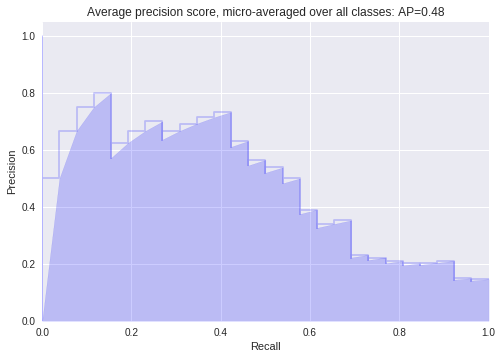

In [142]:
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]))


# Precision-Recall curve for each class

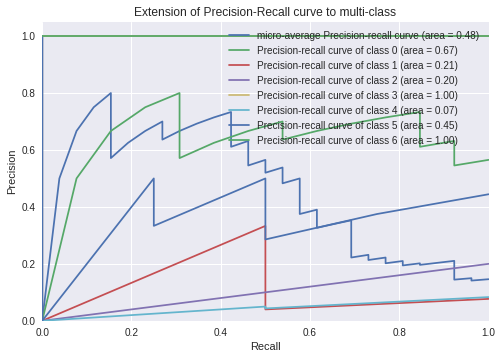

In [143]:
plt.plot(recall["micro"], precision["micro"],
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]))
for i in range(n_classes):
    plt.plot(recall[i], precision[i],
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(loc="best")
plt.show()